<!-- Notebook title -->
# knn

## 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

#### Implement and Evaluate the K-Nearest Neighbors (KNN) Algorithm from Scratch

In this task, you will implement the K-Nearest Neighbors (KNN) algorithm using only Python, without the use of any machine learning libraries like scikit-learn. You will then evaluate the performance of your implementation using various metrics.

##### Download the Dataset

Use the Pima Indian dataset, which can be found [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

##### Implement the KNN Classifier

- Implement the K-Nearest Neighbors (KNN) algorithm from scratch. Your implementation should include:
  - Calculation of distances between instances.
  - Selecting K neighbors to identify the nearest neighbors.
  - Voting mechanism to predict the class of a data point based on its neighbors.

##### Predict the Classes

- Use your KNN implementation to predict the two classes in the Pima Indian dataset (diabetic or non-diabetic).

##### Hyperparameter Tuning

- Experiment with different values of the hyperparameter `K` (number of neighbors) to find the best fit for the model.
- Discuss how the choice of `K` affects the model’s performance.

##### Evaluate the Algorithm

- Evaluate the performance of your KNN implementation using the following metrics:
  - **Accuracy**: The ratio of correctly predicted instances to the total instances.
  - **F1 Score**: The harmonic mean of precision and recall.
  - **Precision**: The ratio of correctly predicted positive observations to all predicted positive observations.
  - **Recall**: The ratio of correctly predicted positive observations to all observations in that actual class.
  - **Mean Squared Error (MSE)**: The average of the squares of the errors between the predicted and actual values.
  - **Confusion Matrix**: A table that describes the performance of the classification model by showing the true positives, true negatives, false positives, and false negatives.

- Plot accuracy and loss graphs (plot an accuracy and loss graph).

##### Additional Instructions

- Choose the network architecture with care.
- Train and validate all algorithms.
- Make the necessary assumptions.

### 1.2 Useful Resources
<!--
- Links to relevant papers, articles, or documentation.
- Description of the datasets (if external).
-->

### 1.2.1 Data

#### 1.2.1.1 Common

* [Datasets Kaggle](https://www.kaggle.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A vast repository of datasets across various domains provided by Kaggle, a platform for data science competitions.
  
* [Toy datasets from Sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of small datasets that come with the Scikit-learn library, useful for quick prototyping and testing algorithms.
  
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)  
  &nbsp;&nbsp;&nbsp;&nbsp;A widely-used repository for machine learning datasets, with a variety of real-world datasets available for research and experimentation.
  
* [Google Dataset Search](https://datasetsearch.research.google.com/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A tool from Google that helps to find datasets stored across the web, with a focus on publicly available data.
  
* [AWS Public Datasets](https://registry.opendata.aws/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A registry of publicly available datasets that can be analyzed on the cloud using Amazon Web Services (AWS).
  
* [Microsoft Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of curated datasets from various domains, made available by Microsoft Azure for use in machine learning and analytics.
  
* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A GitHub repository that lists a wide variety of datasets across different domains, curated by the community.
  
* [Data.gov](https://www.data.gov/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A portal to the US government's open data, offering access to a wide range of datasets from various federal agencies.
  
* [Google BigQuery Public Datasets](https://cloud.google.com/bigquery/public-data)  
  &nbsp;&nbsp;&nbsp;&nbsp;Public datasets hosted by Google BigQuery, allowing for quick and powerful querying of large datasets in the cloud.
  
* [Papers with Code](https://paperswithcode.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A platform that links research papers with the corresponding code and datasets, helping researchers reproduce results and explore new data.
  
* [Zenodo](https://zenodo.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An open-access repository that allows researchers to share datasets, software, and other research outputs, often linked to academic publications.
  
* [The World Bank Open Data](https://data.worldbank.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A comprehensive source of global development data, with datasets covering various economic and social indicators.
  
* [OpenML](https://www.openml.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An online platform for sharing datasets, machine learning experiments, and results, fostering collaboration in the ML community.
  
* [Stanford Large Network Dataset Collection (SNAP)](https://snap.stanford.edu/data/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of large-scale network datasets from Stanford University, useful for network analysis and graph-based machine learning.
  
* [KDnuggets Datasets](https://www.kdnuggets.com/datasets/index.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A curated list of datasets for data mining and data science, compiled by the KDnuggets community.


#### 1.2.1.2 Project

* [Pima Indian Diabetes Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### 1.2.2 Learning

* [K-Nearest Neighbors on Kaggle](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)

* [Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

### 1.2.3 Documentation

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [3]:
import numpy as np
import pandas as pd
from collections import Counter

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

### 2.2.1 Paths

In [4]:
DATA_PATH = '../data/pima-indians-diabetes.data.csv'

### 2.2.2 Seed

In [5]:
RANDOM_SEED = 7

### 2.2.3 Split ratio

In [6]:
SPLITRATIO = 0.8

## 2.3 Function Definitions
<!--
- Define helper functions that will be used multiple times in the notebook.
- Consider organizing these into separate sections (e.g., data processing functions, model evaluation functions).
-->

### 2.3.1 Distance Calculation

In [7]:
def distance(one,two):
    return np.linalg.norm(one-two)

In [8]:
def shortestDistance(x,x_rest,y_rest):
    shortest = distance(x,x_rest[0])
    predicted = y_rest[0]
    for i in range(len(x_rest)):
        if distance(x,x_rest[i])<=shortest:
            shortest = distance(x,x_rest[i])
            predicted = y_rest[i]
    return predicted,shortest

### 2.3.2 K-Nearest Neighbors

In [ ]:
def get_k_nearest_neighbors(x, X_train, Y_train, k):
    distances = [distance(x, X_train[i]) for i in range(len(X_train))]
    sorted_indices = np.argsort(distances)
    top_k_indices = sorted_indices[:k]
    top_k_labels = Y_train[top_k_indices]
    return top_k_labels

In [ ]:
def predict_class(x, X_train, Y_train, k):
    neighbors = get_k_nearest_neighbors(x, X_train, Y_train, k)
    return np.argmax(np.bincount(neighbors.astype(int)))

In [ ]:
def knn_predict(X_val, X_train, Y_train, k):
    predictions = []
    for x in X_val:
        predictions.append(predict_class(x, X_train, Y_train, k))
    return np.array(predictions)

In [10]:
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for x_test in X_test:
        # Calculate distances between x_test and all training samples
        distances = [distance(x_test, x_train) for x_train in X_train]
        # Get the indices of k-nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Determine the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])
    return np.array(y_pred)

### 2.3.3 Evaluation

#### 2.3.3.1 Precision

In [ ]:
def calculate_precision(TP,FP):
    return TP/(TP+FP)

#### 2.3.3.1 Recall

In [ ]:
def calculate_recall(TP,FN):
    return TP/(TP+FN)

#### 2.3.3.2 Accuracy

In [ ]:
def calculate_recall(TP,TN,FP,FN):
    return (TP+TN)/(TP+TN+FP+FN)

#### 2.3.3.3 F1 score

In [ ]:
def calculate_f1(precision,recall):
    return 2*(precision*recall)/(precision+recall)

---

# 3. System Setup 
<!-- (Optional but recommended) -->

## 3.1 Styling
<!--
- Set up any visual styles (e.g., for plots).
- Configure notebook display settings (e.g., `matplotlib` defaults, pandas display options).
-->

## 3.2 Environment Configuration
<!--
- Check system dependencies, versions, and ensure reproducibility (e.g., set random seeds).
-->

### 3.2.1 Seed

In [11]:
np.random.seed(RANDOM_SEED)

---

# 4. Data Processing

## 4.1 Data loading
<!--
- Load datasets from files or other sources.
-->

In [12]:
# Load pima indians dataset
# dataset = np.loadtxt("../data/pima-indians-diabetes.data.csv", delimiter=",")
df = pd.read_csv("../data/pima-indians-diabetes.data.csv", delimiter=",")

## 4.2 Data inspection
<!--
- Preview the data (e.g., `head`, `describe`).
-->

### 4.2.1 Info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4.2.2 Describe

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 4.2.3 Head

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4.3 Data Cleaning
<!--
- Handle missing values, outliers, and inconsistencies.
- Remove or impute missing data.
-->

### 4.3.1 NULL, NaN, Missing values

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
#df.corr()

## 4.4 Feature Engineering
<!--
- Create new features from existing data.
- Normalize or standardize features.
- Encode categorical variables.
-->

### 4.4.1 Normalize

#### 4.4.1.1 Feature Selection / Data Separation

<details>
<summary>What does it?</summary>
<br>
This line removes the `Outcome` column from the DataFrame `df` and assigns the remaining columns to `X`.
</details>
<br>
<details>
<summary>Why do we do it?</summary>
<br>
We do this to separate the input features (which are stored in `X`) from the target variable (which will be stored in `y`). This separation is essential in supervised learning tasks where the goal is to predict the target variable based on the input features.
</details>

In [20]:
X = df.drop(columns='Outcome')

#### 4.4.1.2 Target Variable Extraction

<details>
<summary>What does it?</summary>
<br>
This line selects the `Outcome` column from the DataFrame `df` and assigns it to `y`.
</details>
<br>
<details>
<summary>Why do we do it?</summary>
<br>
We do this to isolate the target variable, which represents the labels or outcomes that we aim to predict using the machine learning model.
</details>

In [21]:
y = df['Outcome']

#### 4.4.1.3 Feature Scaling / Standardization / Z-score Normalization

<details>
<summary>What does it?</summary>
<br>
This line standardizes the features in `X` by subtracting the mean of each feature and dividing by the standard deviation of that feature. This transforms the data so that each feature has a mean of 0 and a standard deviation of 1.
</details>
<br>
<details>
<summary>Why do we do it?</summary>
<br>
Standardization is crucial when using machine learning algorithms that rely on distance calculations (like K-Nearest Neighbors, SVM, or Neural Networks). Without standardization, features with larger scales could dominate the distance calculation, leading to biased model behavior. By standardizing, all features contribute equally to the model, regardless of their original scale.
</details>

In [22]:
X = (X - X.mean()) / X.std()

## 4.6 Data Splitting
<!--
- Split data into training, validation, and test sets.
-->

In [23]:
# Sklearn train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [24]:
dataset = df.to_numpy()
np.random.shuffle(dataset)

In [25]:
# Calculate the split index
split_idx = int(len(X) * SPLITRATIO)

In [26]:
# split into input (X) and output (Y) variables
X_train = dataset[:split_idx,0:8]
X_val = dataset[split_idx:,0:8]
Y_train = dataset[:split_idx,8]
Y_val = dataset[split_idx:,8]
print(X_train)
print(Y_train)

[[1.00e+00 9.00e+01 6.20e+01 ... 2.72e+01 5.80e-01 2.40e+01]
 [7.00e+00 1.81e+02 8.40e+01 ... 3.59e+01 5.86e-01 5.10e+01]
 [1.30e+01 1.52e+02 9.00e+01 ... 2.68e+01 7.31e-01 4.30e+01]
 ...
 [1.10e+01 1.38e+02 7.40e+01 ... 3.61e+01 5.57e-01 5.00e+01]
 [1.00e+00 1.06e+02 7.60e+01 ... 3.75e+01 1.97e-01 2.60e+01]
 [1.00e+01 9.20e+01 6.20e+01 ... 2.59e+01 1.67e-01 3.10e+01]]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0

In [27]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(X_val)):
    x = X_val[i]
    y = Y_val[i]
    pred,shortest = shortestDistance(x,X_train,Y_train)
    print("Y:",pred,"Y hat",y,"Distance:",shortest)

    if(y==1 and pred ==1):
        TP += 1

    if(y==0 and pred ==0):
        TN += 1

    if(y==1 and pred ==0):
        FN += 1

    if(y==0 and pred ==1):
        FP += 1

Y: 1.0 Y hat 1.0 Distance: 17.639135579727256
Y: 0.0 Y hat 0.0 Distance: 15.196073703427476
Y: 0.0 Y hat 0.0 Distance: 11.455769245231853
Y: 0.0 Y hat 0.0 Distance: 19.715015191472716
Y: 0.0 Y hat 0.0 Distance: 25.58621818479628
Y: 1.0 Y hat 0.0 Distance: 16.71555072380207
Y: 0.0 Y hat 0.0 Distance: 25.396878627106915
Y: 0.0 Y hat 0.0 Distance: 9.940226355571587
Y: 0.0 Y hat 1.0 Distance: 16.031046410013293
Y: 1.0 Y hat 0.0 Distance: 4.594188067547954
Y: 0.0 Y hat 0.0 Distance: 14.26556637501645
Y: 0.0 Y hat 0.0 Distance: 12.145613241001874
Y: 0.0 Y hat 0.0 Distance: 76.70057108001217
Y: 0.0 Y hat 1.0 Distance: 22.073590577882882
Y: 0.0 Y hat 0.0 Distance: 13.85131849319768
Y: 0.0 Y hat 0.0 Distance: 18.455720224364043
Y: 1.0 Y hat 0.0 Distance: 12.077305825390031
Y: 0.0 Y hat 0.0 Distance: 9.27521428323896
Y: 0.0 Y hat 0.0 Distance: 8.09310082724786
Y: 0.0 Y hat 1.0 Distance: 24.665026434204364
Y: 0.0 Y hat 0.0 Distance: 8.804847755640072
Y: 1.0 Y hat 0.0 Distance: 28.26052625129263
Y

In [28]:
print("Accuracy:",(TP+TN)/(TP+TN+FP+FN))
print("Recall",TP/(TP+FN))
print("Precision",TP/(TP+FP))
print("F1",(2*TP)/(2*TP+FP+FN))

Accuracy: 0.6948051948051948
Recall 0.5833333333333334
Precision 0.509090909090909
F1 0.5436893203883495


In [29]:
#import pdb;pdb.set_trace()
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [30]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
print(neigh.predict([X_val[0]]))

[1.]


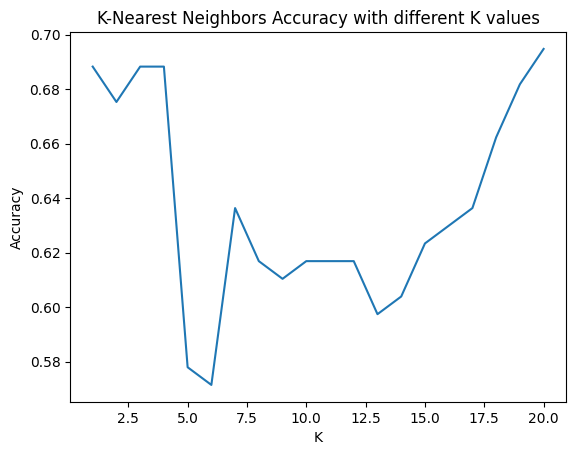

In [32]:
import matplotlib.pyplot as plt

# List to store accuracy for different K values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(X_val)):
        x = X_val[i]
        y = Y_val[i]
        pred, _ = shortestDistance(x, X_train[:k], Y_train[:k])
        if(y == 1 and pred == 1):
            TP += 1
        elif(y == 0 and pred == 0):
            TN += 1
        elif(y == 1 and pred == 0):
            FN += 1
        elif(y == 0 and pred == 1):
            FP += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracies.append(accuracy)

# Plotting
plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Accuracy with different K values')
plt.show()


In [ ]:
# Experiment with different values of K and evaluate the model
k_values = range(1, 21)
accuracies = []
f1_scores = []
precisions = []
recalls = []
mses = []

for k in k_values:
    Y_pred = knn_predict(X_val, X_train, Y_train, k)
    accuracy = np.mean(Y_pred == Y_val)
    f1 = f1_score(Y_val, Y_pred)
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    mse = mean_squared_error(Y_val, Y_pred)
    
    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    mses.append(mse)

# Plot accuracy, F1 score, precision, recall, and MSE
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1 Score vs. K')
plt.xlabel('K')
plt.ylabel('F1 Score')

plt.subplot(2, 2, 3)
plt.plot(k_values, precisions, marker='o')
plt.title('Precision vs. K')
plt.xlabel('K')
plt.ylabel('Precision')

plt.subplot(2, 2, 4)
plt.plot(k_values, recalls, marker='o')
plt.title('Recall vs. K')
plt.xlabel('K')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(k_values, mses, marker='o')
plt.title('MSE vs. K')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.show()


---

# 5. Model Development

## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->